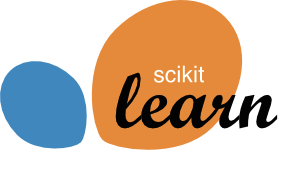

# Scikit-Learn Overview
***
## What is Scikit-Learn?
A Python library for machine learning, its name comes from how it was originally created as a SciPy tool kit (Scikit) for machine learning (Learn).

The library contains many supervised and non-supervised algorithms as well as other functionality to allow you to more easily manipulate your data, like for example, ways to easily split up your datasets into testing, training and validation sets.
But that is not to say that it acts as an alternative to numpy or pandas, but rather it provides functionality that works with these other packages.

[Direct-link to scikit-learn website](https://scikit-learn.org/stable/index.html)
***
## How Does Scikit-Learn work?
Across the models implemented in Scikit-Learn Estimators are the main API used, they are the objects that fit data to the model whether it be for supervised or non-supervised 
algorithms. 

To demonstrate the operation of sklearn I'll break this out across a few steps:
1) Creating an estimator from a model e.g. LinearRegression().
2) Create and shape some data to fit the estimator.
3) Predict values not fitted to the estimator.
4) Visualise the data used to fit and the estimator's predictions.

In the next cell a simple example is shown where a estimator variable called 'lin_reg' is defined for performing some linear regression.

In [1]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

***
### 'Shape' of the data
With an estimator object initialised, it needs to be fitted to some data to be useful and be able to predict values.

All data inputted to sklearn must be 2D in shape (though there is an exception to this when fitting, as you can have the response variable as 1D), this essentially means an array of array's where each in the index of the outer array essentially represents a row of data.

``
[[1,2,3]
,[1,2,3]]
``

This is handled normally in pandas due to how it represents data natively in dataframes with rows and columns, however in the case of taking a list or numpy array it may be necessary to first reshape the data before using it to fit your model/estimator.

In the next cell, a Python list is converted to an array and then reshaped so it is 2D.

In [2]:
import numpy as np

X = [1,2,3,4]
y = [1,2,3,4]

X = np.array(X) #Change X to numpy array and reshape
X = X.reshape(-1,1) #Reshape so it is in format [[1],[2],...]

lin_reg.fit(X,y) #equivalent to >>>lin_reg.fit([[1],[2],[3],[4]],[1,2,3,4])

test = str(X)

print(f"Input X shape:{X}\nInput y shape:{y}")

Input X shape:[[1]
 [2]
 [3]
 [4]]
Input y shape:[1, 2, 3, 4]


***
### Predicting values not used to fit
With the estimator defined and fitted using X and y, we can now use it estimate future values, a very simple linear input was used so the predictions here will be pretty obvious.

And we can see by getting the coefficient that it is a multiple of 1, so any value we want to predict will be scaled by 1.

And any line will intercept the x and y-axis at 0.

In [3]:
print(f"Predicted value for one we have already fitted with; 3 = {lin_reg.predict([[3]])}")
print(f"Predicting with values not fitted with; 5 = {lin_reg.predict([[5]])}, 6 = {lin_reg.predict([[6]])}, 10 = {lin_reg.predict([[10]])}")
print(f"\nCoefficient {lin_reg.coef_}\nIntercept {lin_reg.intercept_}")

Predicted value for one we have already fitted with; 3 = [3.]
Predicting with values not fitted with; 5 = [5.], 6 = [6.], 10 = [10.]

Coefficient [1.]
Intercept 0.0


***
### Visualising the Estimator
With the fitted data and the estimator to provide predictions, the data can be plotted simply using matplotlib.

Taking the points the estimator was fitted with (X and y) a few initial points will be plotted, these are the known values and will be plotted using black dots.

Then some values will be predicted with the estimator, these will be pretty simple but a few incrementally larger steps will be taken, these points will be plotted using red dots.

Lastly using the estimator's coefficient and intercept (and using numpy's linspace function to generate some numbers), we will create some data to show the line that any points should follow, and will overlay the points using a blue line to show this.

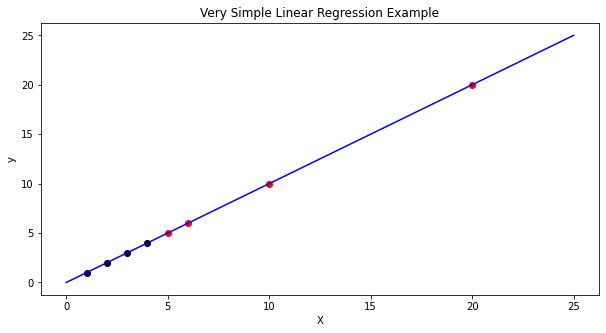

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5)) #set figure size

#title and label axis'
plt.title('Very Simple Linear Regression Example')
plt.xlabel('X') 
plt.ylabel('y')

plt.plot(X,y,'ko') #plot points we know as black dots

X2 = np.array([5,6,10,20]).reshape(-1,1) #Create a new X2 variable, this will represent values to predict
y2 = lin_reg.predict(X2) #Create y2 to hold predicted values
plt.plot(X2,y2,'ro') #plot new data with red dots

X3 = np.linspace(lin_reg.intercept_,25,26) #Create new X3 variable, this will start with model/estimators intercept
y3 = X3*lin_reg.coef_ + lin_reg.intercept_ #y3 is X3 times the coefficient(1.0) plus the intercept(0.0)
plt.plot(X3,y3, 'b-') #plot the line to overlay the points

plt.show()

***
## Evaluating Estimators

There are quite a few options for evaluating how good your estimator/model is at predicting and a detailed documentation can be found [here in the sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html).

Here a few examples will be stepped through which can be easily used in determining how good your model is.

### Score

The score function can be used to get the $ R^2 $ of your model which takes in a feature dataset (X or X_train as will be used in later examples) and it's asssociated target dataset (y or y_train as will be used in later examples).

As you can see in below example we get a score of 1.0, in a real dataset this would likely be an indication of overfitting, and for demonstration purposes this doesn't really work well, so lets redo the fit for lin_reg and this time jitter the values about a little so it's not so exactly linear.

In [5]:
print(f"Suspiciously good R-squared score: {lin_reg.score(X,y)}")

#refit model but make values a bit rougher
X = [0.5,2,3,4]
y = [1.1,0.2,4,7]

X = np.array(X) #Change X to numpy array and reshape
X = X.reshape(-1,1) #Reshape so it is in format [[1],[2],...]

lin_reg.fit(X,y) #equivalent to >>>lin_reg.fit([[1],[2],[3],[4]],[1,2,3,4])

print(f"After adjusting values around score is: {lin_reg.score(X,y)}")

Suspiciously good R-squared score: 1.0
After adjusting values around score is: 0.7246841243136131


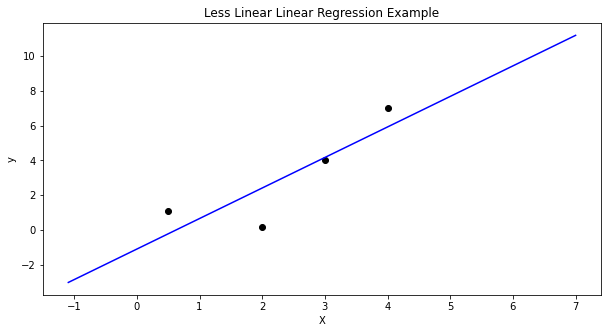

In [6]:
plt.figure(figsize=(10,5)) #set figure size
plt.title('Less Linear Linear Regression Example')
plt.xlabel('X') 
plt.ylabel('y')

plt.plot(X,y,'ko') #plot points we know as black dots

Xline = np.linspace(lin_reg.intercept_,7,9) #Create new X3 variable, this will start with model/estimators intercept
yline = Xline*lin_reg.coef_ + lin_reg.intercept_ #y3 is X3 times the coefficient(1.0) plus the intercept(0.0)
plt.plot(Xline,yline, 'b-') #plot the line to overlay the points

After seeing the data both ways now it's pretty clear why the score is worse, as you can see in last plot, the blue line represents the equation of the line, so the score, the $ R^2 $ of 0.72 makes sense as the points are generally centered around the line but are not exactly on it.

***
## Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Getting the mean absolute error is another way of evaluating your model, it tells you how far off your prediction is on average from the actual. Where the lower the MAE the better, as it means your predictions are closer to the actual.

It's a fairly trivial calculation to perform, but sklearn has a package for it which is very convenient.

Please note in the below example in a practical setting, you would likely also be performing this on a test set of data as outputed from train_test_split(), this will be covered later in the notebook in the Algorithm demonstrations, as there will be a proper dataset pulled in there.

In [7]:
from sklearn.metrics import mean_absolute_error

y_pred = lin_reg.predict(X)
print(f"MAE is {mean_absolute_error(y_pred,y)}, which given the scale of our values is really not very good.")

MAE is 1.194392523364486, which given the scale of our values is really not very good.


***
## Cross Validation

# Algorithm Demonstration

***
## Lasso Model

In this section Lasso algorithm will be explored, but first a dataset needs to be chosen, explored a bit to familiarise with the contents.

### Selecting a dataset

For this the California Housing Dataset from Scikit Learn will be used. It is an inbuilt dataset to the sklearn package, which means csv files for holding the data won't be necessary.

In [10]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd 

#get the dataset object, set as_frame=True to get pandas dataframe returned too
cali_house_data = fetch_california_housing(as_frame=True)

In [11]:
pprint(cali_house_data)
print(cali_house_data.keys())

{'DESCR': '.. _california_housing_dataset:\n'
          '\n'
          'California Housing dataset\n'
          '--------------------------\n'
          '\n'
          '**Data Set Characteristics:**\n'
          '\n'
          '    :Number of Instances: 20640\n'
          '\n'
          '    :Number of Attributes: 8 numeric, predictive attributes and the '
          'target\n'
          '\n'
          '    :Attribute Information:\n'
          '        - MedInc        median income in block group\n'
          '        - HouseAge      median house age in block group\n'
          '        - AveRooms      average number of rooms per household\n'
          '        - AveBedrms     average number of bedrooms per household\n'
          '        - Population    block group population\n'
          '        - AveOccup      average number of household members\n'
          '        - Latitude      block group latitude\n'
          '        - Longitude     block group longitude\n'
          '\n'
  

***

### Exploring the dataset
First print the dataset object itself to understand how it's structured, to do so pprint is used to better format the output, this gives us a pretty good idea of how the data is structured within but to make sure the object keys themselves are printed.

What the dataset also conveniently tells us (which won't be the case a lot of the time) is what our features are and what the target is.

By printing out the keys to the dataset how it can be used starts to become clear, where each key represents a list of values (with the exception of 'DESCR' which has a textual description of the dataset), in the next cell these will start to be stitched together to give a pandas dataframe to explore the dataset further and see if there are any potential issues like NULL values to account for. 
***

In [12]:
cali_house_df = cali_house_data['frame']
cali_house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
#show info on the dataframe, this will determine whether we have null values and column datatypes
cali_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


***
Looking at the table head and it's info tells us that we have no null values - this is useful to know as it means imputing values is not necessary.
That all columns in the dataframe are a numeric (float) type.
It also shows there is 20640 rows total, so not an insubstantial dataset, especially when compared against the Iris dataset - this may have a consequence where any scatterplots might become very difficult to distinguish due to the number of points

***

Next to get an idea of what data is in the dataframe some simple hist plots are done, this can conveniently be done directly against the pandas dataframe.

Dataset target (what we want to predict)- ['MedHouseVal']
Dataset features (what we can use to predict the target) - ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


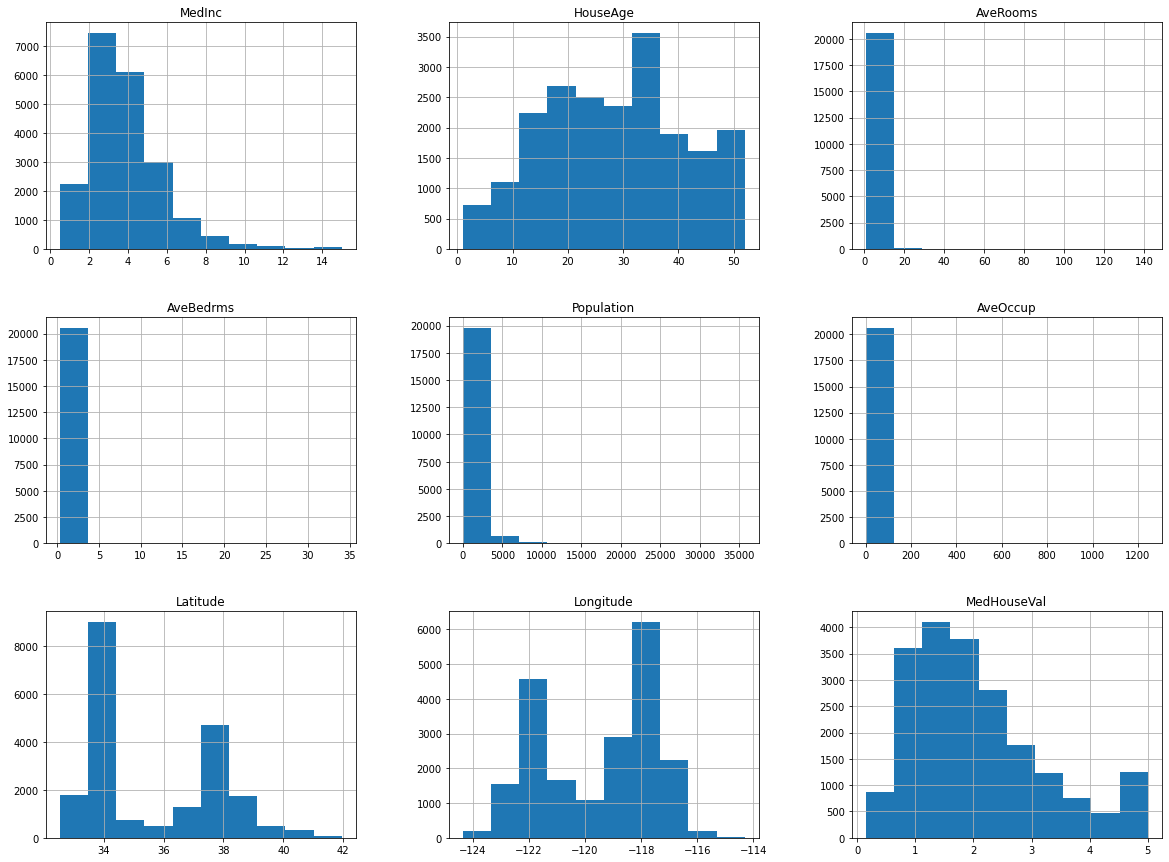

In [14]:
#plot values in the dataframe with histogram
cali_house_df.hist(figsize=(20,15))

print(f"Dataset target (what we want to predict)- {cali_house_data.target_names}")
print(f"Dataset features (what we can use to predict the target) - {cali_house_data.feature_names}")
plt.show()

***
By showing the target and features from the dataset alongside the histograms can now begin to see some relationships and potentially what might have the strongest influence on the target MedHouseVal.
Looking at the above histograms doesn't tell a whole lot, and certainly doesn't describe any of how strongly any of the features may influence the target, however it does give an idea of the distributions of values, namely MedHouseVal tends to have most houses in the region of 150,000, with decreasing either side of that (with the exception of a spike in the region approaching 500,000 (maybe they went to a few rich neighbourhoods when gathering this data)

***
### Splitting our dataset to fit the model
Next the dataset is going to be split into testing and training datasets

In [124]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = cali_house_df.drop('MedHouseVal',axis=1)
#X = X[['MedInc', 'AveBedrms']]
X = X.drop('Population',axis=1)
#X = X.drop('AveOccup',axis=1)
#X = X.drop('Longitude',axis=1)
#X = X.drop('Latitude',axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
#X = cali_house_df[['MedInc','AveBedrms', 'Longitude', 'Latitude']]
y = cali_house_df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=11)#set a radom state for consistency when testing

In [125]:
from sklearn import linear_model

#initialise model
lasso_reg = linear_model.Lasso(alpha=1)
#fit with training data
lasso_reg.fit(X_train,y_train)
#get R^2 score 
print(f"Model Score: {lasso_reg.score(X_test,y_test)}")
y_pred = lasso_reg.predict(X_test)
print("\nNote: For the MAE, a value of 1 represents 100,000 dollars, so while the MAE may not look too bad it is off by over 70,000 dollars")
print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")

Model Score: -0.0008846708572047834

Note: For the MAE, a value of 1 represents 100,000 dollars, so while the MAE may not look too bad it is off by over 70,000 dollars
Model MAE: 0.9119341537918395


***
### Interpreting basic model evaluation
Using Lasso model with this dataset, we get a very poor result, so we will next explore how we could improve this by tuning it's hyperparemeters.

For Lasso it's alpha argument is by default set equal to 1, by setting it to 0 it acts in an equivalent manner to Linear Regression, so that's what will be tried next to see how the two compare and before doing further tuning to determine what is the best value to set for alpha.

In [121]:
#with alpha set to 0 should behave same as linear regression model
lasso_reg = linear_model.Lasso(alpha=0) 
#fit model
lasso_reg.fit(X_train,y_train)
#get score
lasso_reg.score(X_test,y_test)
print(f"Model Score: {lasso_reg.score(X_test,y_test)}")
y_pred = lasso_reg.predict(X_test)

print(f"Model MAE: {mean_absolute_error(y_pred,y_test)}")

C:\Users\itske\AppData\Local\Temp/ipykernel_17172/3165188283.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train,y_train)
c:\users\itske\desktop\education\gmit modules\machine learning and statistics 52954\machine-learning-and-statistics-assessment\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Model Score: 0.6009453451755982
Model MAE: 0.5378413155765961


c:\users\itske\desktop\education\gmit modules\machine learning and statistics 52954\machine-learning-and-statistics-assessment\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.034e+03, tolerance: 2.056e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


***
Now that we've gotten a few warnings against what we've just done, as it reccomends to instead of setting alpha to 0 you are likely better of to either use LinearRegression or Ridge models instead.

But we do indeed see a much better score and Mean Absolute Error.

***
TODO:
* Add subsection tuning hyperparameters
* Add subsection showing cross validation 
* Maybe add section on feature selection using coefficient?
* Show LassoCV which can essentially do the above but with fewer lines

In [ ]:
lasso

In [108]:
importance = abs(lasso_reg.coef_)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.77936
Feature: 1, Score: 0.12271
Feature: 2, Score: 0.12973
Feature: 3, Score: 0.15701
Feature: 4, Score: 0.02737
Feature: 5, Score: 0.79115
Feature: 6, Score: 0.75747


In [80]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')